# Segment A549 cells using a trained cellpose 
Author: Ke  
Data source: Dr. Weikang Wang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread
from pathlib import Path
from livecellx.preprocess.utils import normalize_img_to_uint8
from livecellx.segment.cellpose_utils import segment_single_images_by_cellpose, segment_single_image_by_cellpose


In [2]:
# path for saving re-fitted cellpose model
pretrained_model_path = "./notebook_results/cellpose/cellpose_A549_cyto2/models/cellpose_residual_on_style_on_concatenation_off_cellpose_A549_cyto2_2023_03_07_01_07_22.191293"
# model_type='cyto' or 'nuclei' or 'cyto2'
# model = models.Cellpose(gpu=True, model_type="cyto2", pretrained_model=pretrained_model_path)
model = models.CellposeModel(pretrained_model=pretrained_model_path, gpu=True) #, model_type="cyto2")

In [3]:
from livecellx.core.datasets import LiveCellImageDataset, SingleImageDataset
dataset_dir_path = Path(
    "../datasets/test_data_STAV-A549/DIC_data"
)

mask_dataset_path = Path("../datasets/test_data_STAV-A549/mask_data")
dic_dataset = LiveCellImageDataset(dataset_dir_path, ext="tif")

3 tif img file paths loaded;


img dim:  (2048, 2048)


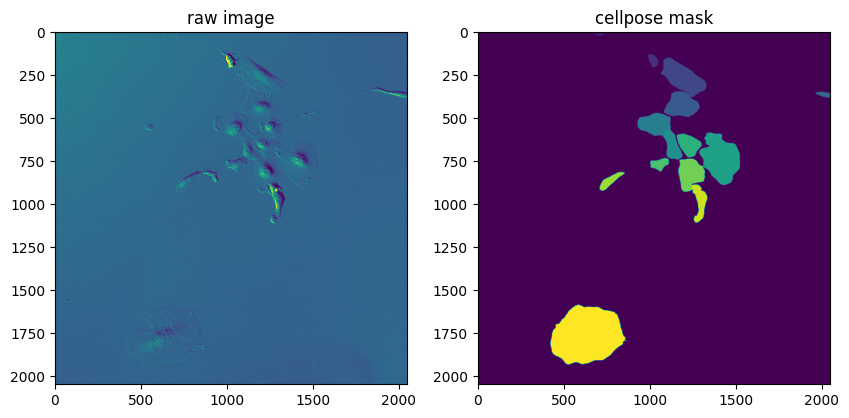

img dim:  (2048, 2048)


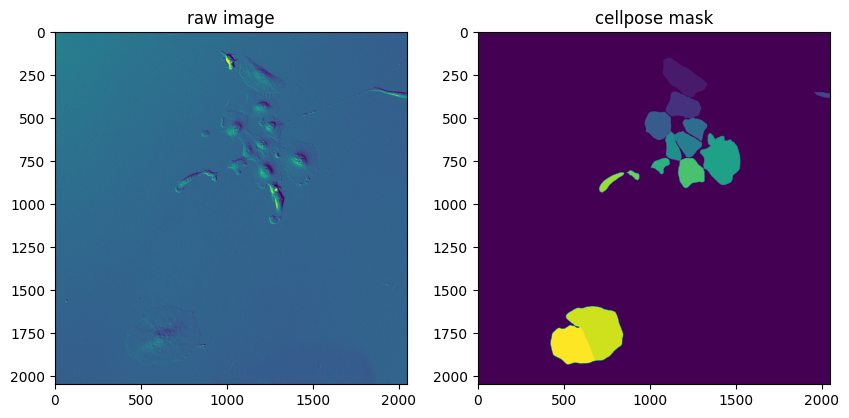

In [7]:
from livecellx.preprocess.utils import enhance_contrast
import random

num_img_to_viz = 2
times = dic_dataset.times
for i in range(0, num_img_to_viz):
    # randomly sample a time from the dataset
    img = dic_dataset[times[random.randint(0, len(times) - 1)]]
    img = normalize_img_to_uint8(img)
    print("img dim: ", img.shape)
    mask = segment_single_image_by_cellpose(img, model, channels=[[0, 0]], diameter=80)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(enhance_contrast(img))
    axes[0].set_title("raw image")
    axes[1].imshow(mask)
    axes[1].set_title("cellpose mask")
    plt.show()

In [12]:
from livecellx.core.io_utils import save_png
diameter = 80
out_dir = Path("./notebook_results/cellpose/test_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

for time in dic_dataset.times:
    img = dic_dataset[time]
    img = normalize_img_to_uint8(img)
    mask = segment_single_image_by_cellpose(img, model, channels=[[0, 0]], diameter=diameter)
    
    # save the mask
    mask_path = out_dir / f"mask_{time}.png"
    save_png(mask_path, mask, mode="I")